# Bike Search Platform

The purpose of this application is to give the user a simple way both defining a bicycle design space and searching for possible optimum solutions within that design space. This interface allows the user to specify each of a bicycle component's values as shown below, as well as list multiple riders to test the bike with. Additionally, the user must input a target handling curve, which is the curve that defines the bicycle's control sensitivity over a range of speeds. This handling curve will be used as a datum by which all other bicycle designs in the search space will be measured against.

This interface then allows the user to choose from one of three different search algorithms:
- Brute Force Search
- Unpartitioned Genetic Search
- Partitioned Genetic Search

Brute force search will try every combination of bicycle parameters in the bicycle design space, resulting in a thorough (but often time consuming) process. The two genetic search platforms use the principles of evolutionary computation to try and converge to a **strong** solution in a much shorter time using tuned stoichastic methods. While these two search algorithms will not often find the optimum solution, they do run in a fraction of the time of the brute force implementation, allowing the user to iterate quicker (and shrink their bicycle design space as well). The primary difference between the unpartitioned and partitioned genetic search implementations is that that partitioned version will perform a *grouping operation* on each iteration of the algorith with the hopes of improving the resulting output. Additionally, the partitioned algorithm will aggregate the final designs in an attempt to show only those designs that are fairly unique in the final output.

All of this is aggregated together when the model is run at the bottom of this form, and two plots are output. The first plot shows the bicycle design with each rider superimposed on it, and the second plot shows the control sensitivity values that were computed for each rider on the bicycle. The resulting output will be saved as an HTML file to the filename you specified.

## Steps to using this bike search platform:
1. Specify the bicycle's component parameter ranges.
2. Specify each rider(s) parameters.
3. Specify the target control sensitivity curve values (1 per km/hr).
4. Specify an output filename to print the results to.
5. Alter the genetic config if desired.
6. Alter the partitioning config if desired.
7. Choose which of the three search platforms to use.
8. Run the platform.

## Specify the Bicycle Config Parameters
The bicycle parameter set is outlined in the figure and table below. Choose a single value for each of these parameters and fill out the bicycle parameters file below.

<img src="img/bicycle_params.png" alt="Drawing" align=left style="width: 650px;"/>
<img src="img/bicycle_params_table.png" alt="Drawing" align=left style="width: 300px;"/>

In [1]:
%%writefile temp/bike_params.txt

# Design space including the Gemini bicycle frame
wheelbase           = 0.5 to 1.5 by 0.15        # [m]
hip_angle           = 50 to 110 by 10           # [degrees]
headtube_angle      = 0 to 20 by 2              # [degrees]
crank_radius        = [0.165, 0.170, 0.175]     # [m]
crank_x_offset      = -0.6 to -0.2 by 0.05      # [m]
crank_z_offset      = 0.2 to 0.5 by 0.05        # [m]
fork_offset         = [0, -0.03, -0.06, -0.075] # [m]
seat_height         = 0.4 to 1.2 by 0.025       # [m]
handlebar_radius    = 0.1 to 0.4 by 0.05        # [m]
front_wheel_radius  = [0.23, 0.28, 0.336]       # [m]
rear_wheel_radius   = [0.23, 0.28, 0.336]       # [m]
frame_mass          = 5                         # [kg]
crank_mass          = 1                         # [kg]
front_wheel_mass    = 2                         # [kg]
rear_wheel_mass     = 2                         # [kg]

Overwriting temp/bike_params.txt


## Specify the Rider Config Parameters

The riders configuration file is similar to that of the bicycle configuration file in that each parameter can only have a single value. However, since a bicycle design can fit multiple riders, this configuration file allows you to specify parameters for multiple people (the below file shows 2 riders as an example). As such, each rider is designated by one of the parameter paragraphs shown below. To add a new rider, copy/paste one of the paragraphs and change the new one's values. To remove a rider, just remove a paragraph. Rider's are modeled as simple geometric shapes as shown below.

<img src="img/rider_params.png" alt="Drawing" align=left style="width: 550px;"/>
<img src="img/rider_params_table.png" alt="Drawing" align=left style="width: 350px;"/>

In [2]:
%%writefile temp/rider_params.txt

# Rider Parameters for Chris
rider_name    = Chris
rider_mass    = 60      # [kg]
head_diameter = 0.185   # [m]
torso_length  = 0.48    # [m]
torso_depth   = 0.15    # [m]
torso_width   = 0.2     # [m]
arm_length    = 0.5     # [m]
arm_diameter  = 0.08    # [m]
leg_length    = 1.0     # [m]
leg_diameter  = 0.12    # [m]

Overwriting temp/rider_params.txt


## Specify the Target Control Sensitivity Curve

This section specify the control sensitivity curve values that are to be used a the datum to comparse each of the above rider's computed sensitivity curves against. This file is expected to have a single decimal value per line, with that value representing the bicycle's control sensitivity value at speeds that are incrementing by 1 km/hr. Additionally, comments are allowed as their own line and inline. See the below file as an example.

In [3]:
%%writefile temp/target_control_curve.txt

# Each of these sensitiity values are taken at 1 km/hr increments.
0.0   #  0 [km/hr]
2.22  #  1 [km/hr]
4.13  #  2 [km/hr]
5.55  #  3 [km/hr]
6.44  #  4 [km/hr]
6.91  #  5 [km/hr]
7.07  #  6 [km/hr]
7.02  #  7 [km/hr]
6.85  #  8 [km/hr]
6.60  #  9 [km/hr]
6.33  # 10 [km/hr]
6.05  # 11 [km/hr]
5.76  # 12 [km/hr]
5.49  # 13 [km/hr]
5.23  # 14 [km/hr]
4.99  # 15 [km/hr]
4.76  # 16 [km/hr]
4.55  # 17 [km/hr]
4.35  # 18 [km/hr]
4.17  # 19 [km/hr]
4.00  # 20 [km/hr]
3.84  # 21 [km/hr]
3.69  # 22 [km/hr]
3.55  # 23 [km/hr]
3.42  # 24 [km/hr]
3.30  # 25 [km/hr]

Overwriting temp/target_control_curve.txt


## Specify the Partitioning Config Parameters
This section specifies the tuned parameters used by both the partitioned and unpartitioned genetic platforms. While these values were tuned to give the best general performance across the entire bicycle design space, you may alter any of their parameters as you see fit to adjust to your current search needs.

In [4]:
%%writefile temp/genetic_params.txt

# Genetic Algorithm Config Parameters
num_runs              = 10     # Number of runs for each trial to average across
generation_count      = 8      # Number of generations to run
population_size       = 500    # Size of each generation's population
selection_percentage  = 5      # % population to be selected from per iteration
cross_over_percentage = 25     # % population to be crossed-over per iteration
mutation_percentage   = 5      # % population to be mutated per iteration
cross_over_gene_count = 8      # Number of genes to involve during cross-over
mutation_gene_count   = 8      # Number of genes to involve during mutation

Overwriting temp/genetic_params.txt


## Specify the Partitioning Config Parameters
This section defines the tuned parameters used by the partitioned genetic search platform. You may alter these as you see fit to adjust how your bike output is clustered.

In [5]:
%%writefile temp/partitioning_params.txt

# Partitioning Parameters
radius     = 1
attributes = [crank_x_offset, crank_z_offset, hip_angle, wheelbase]

Overwriting temp/partitioning_params.txt


## Load the appropriate modules
*This is just so we can run the model*

In [6]:
import os
import sys
module_path = os.path.abspath(os.path.join('python3'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext bike
%load_ext bike_file_plotter
%load_ext bike_search_base
%load_ext brute_force_search
%load_ext genetic_operator_base
%load_ext config_parser
%load_ext partitioned_genetic_operators
%load_ext partitioned_genetic_search
%load_ext r_partition
%load_ext r_partition_base
%load_ext simulation_params
%load_ext unpartitioned_genetic_operators
%load_ext unpartitioned_genetic_search

## Choose the Search Simulation to Use

In [7]:
import ipywidgets as widgets
from IPython.display import display

button = widgets.Dropdown(
    options=['Brute Force Search', 'Unpartitioned Genetic Search', 'Partitioned Genetic Search'],
    value='Unpartitioned Genetic Search',
    description='Search Algorithm To Use:',
    disabled=False,
    button_style='success'
)

display(button)

## Run the Simulation

Running Partitioned Genetic Search

Selection %: 5.0, Cross Over %: 25.0, Mutation %: 5.0 -- Runtime: 33.427001953125
Number of partitions: 8
Total time: 33.4612181186676


Bike Params:
{'wheelbase': 0.9500000000000001, 'hip_angle': 80.0, 'headtube_angle': 16.0, 'crank_radius': 0.175, 'crank_x_offset': -0.35, 'crank_z_offset': 0.49999999999999994, 'fork_offset': 0.0, 'seat_height': 0.9500000000000005, 'handlebar_radius': 0.15000000000000002, 'front_wheel_radius': 0.28, 'rear_wheel_radius': 0.336, 'frame_mass': 5.0, 'crank_mass': 1.0, 'front_wheel_mass': 2.0, 'rear_wheel_mass': 2.0}


Rider: Chris
{'rider_name': 'Chris', 'rider_mass': 60.0, 'head_diameter': 0.185, 'torso_length': 0.48, 'torso_depth': 0.15, 'torso_width': 0.2, 'arm_length': 0.5, 'arm_diameter': 0.08, 'leg_length': 1.0, 'leg_diameter': 0.12}


Control Sensitivity Values:
[0.0, 2.1799936940941325, 4.055452476639471, 5.448861664167466, 6.339662593754227, 6.809323875602554, 6.9719580175118185, 6.931669926780212, 6.7676790962

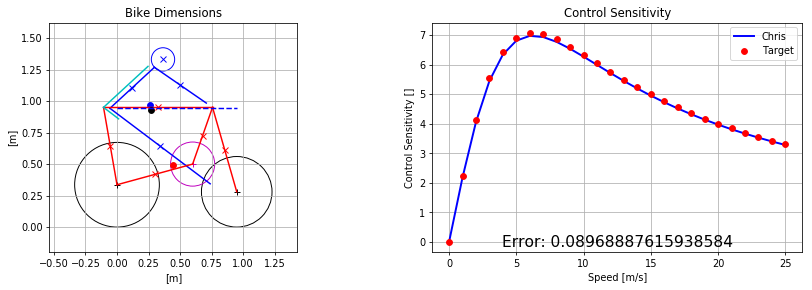



Bike Params:
{'wheelbase': 1.25, 'hip_angle': 90.0, 'headtube_angle': 18.0, 'crank_radius': 0.165, 'crank_x_offset': -0.35, 'crank_z_offset': 0.44999999999999996, 'fork_offset': -0.075, 'seat_height': 1.0250000000000004, 'handlebar_radius': 0.25, 'front_wheel_radius': 0.28, 'rear_wheel_radius': 0.28, 'frame_mass': 5.0, 'crank_mass': 1.0, 'front_wheel_mass': 2.0, 'rear_wheel_mass': 2.0}


Rider: Chris
{'rider_name': 'Chris', 'rider_mass': 60.0, 'head_diameter': 0.185, 'torso_length': 0.48, 'torso_depth': 0.15, 'torso_width': 0.2, 'arm_length': 0.5, 'arm_diameter': 0.08, 'leg_length': 1.0, 'leg_diameter': 0.12}


Control Sensitivity Values:
[0.0, 2.2988349152569505, 4.25657614003102, 5.682267185838059, 6.564973272794277, 7.00408708267589, 7.128579052058753, 7.051228205171619, 6.855031100003569, 6.595551409279797, 6.307854907261911, 6.0131216506898335, 5.723609146327469, 5.446019395843365, 5.183670846722378, 4.937862294497669, 4.708716403230334, 4.495696197098971, 4.297918522976504, 4.1

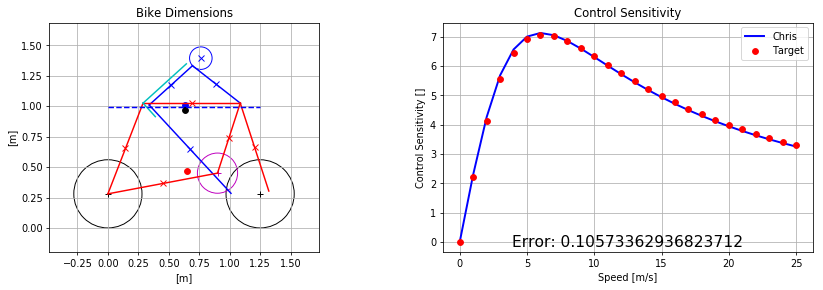



Bike Params:
{'wheelbase': 1.1, 'hip_angle': 110.0, 'headtube_angle': 18.0, 'crank_radius': 0.165, 'crank_x_offset': -0.6, 'crank_z_offset': 0.3, 'fork_offset': -0.03, 'seat_height': 1.0500000000000003, 'handlebar_radius': 0.2, 'front_wheel_radius': 0.28, 'rear_wheel_radius': 0.28, 'frame_mass': 5.0, 'crank_mass': 1.0, 'front_wheel_mass': 2.0, 'rear_wheel_mass': 2.0}


Rider: Chris
{'rider_name': 'Chris', 'rider_mass': 60.0, 'head_diameter': 0.185, 'torso_length': 0.48, 'torso_depth': 0.15, 'torso_width': 0.2, 'arm_length': 0.5, 'arm_diameter': 0.08, 'leg_length': 1.0, 'leg_diameter': 0.12}


Control Sensitivity Values:
[0.0, 2.307054480297754, 4.269511553891238, 5.695353290922486, 6.574883992315326, 7.009385199754418, 7.129227513197172, 7.047886796534117, 6.848563797682754, 6.586777548910976, 6.2974576128164355, 6.001634396003487, 5.711433398264127, 5.433450495016683, 5.170922718395038, 4.925087966876357, 4.696023987523003, 4.483160930149322, 4.285591686086933, 4.10225767740446, 3.9

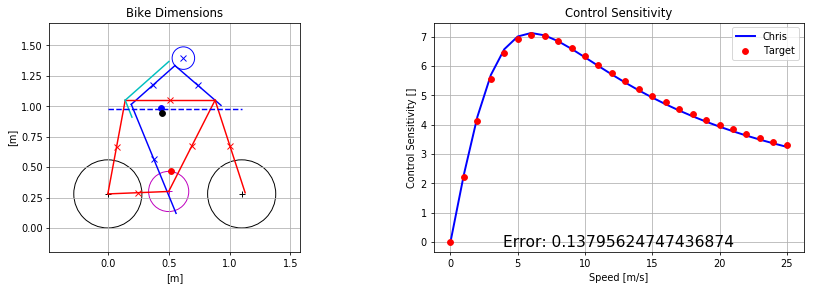



Bike Params:
{'wheelbase': 0.8, 'hip_angle': 70.0, 'headtube_angle': 4.0, 'crank_radius': 0.165, 'crank_x_offset': -0.3, 'crank_z_offset': 0.49999999999999994, 'fork_offset': -0.06, 'seat_height': 1.125, 'handlebar_radius': 0.2, 'front_wheel_radius': 0.28, 'rear_wheel_radius': 0.336, 'frame_mass': 5.0, 'crank_mass': 1.0, 'front_wheel_mass': 2.0, 'rear_wheel_mass': 2.0}


Rider: Chris
{'rider_name': 'Chris', 'rider_mass': 60.0, 'head_diameter': 0.185, 'torso_length': 0.48, 'torso_depth': 0.15, 'torso_width': 0.2, 'arm_length': 0.5, 'arm_diameter': 0.08, 'leg_length': 1.0, 'leg_diameter': 0.12}


Control Sensitivity Values:
[0.0, 2.1194538373357155, 3.9515443705037265, 5.325596659148774, 6.217190012586712, 6.699609470019331, 6.879777585669262, 6.857335531759221, 6.709369239833778, 6.489785680839498, 6.234020657878281, 5.964380304097623, 5.694389426854718, 5.431905167662011, 5.181210683490288, 4.944376431141694, 4.722128699489978, 4.5143974511279295, 4.320659027246354, 4.140148783257517

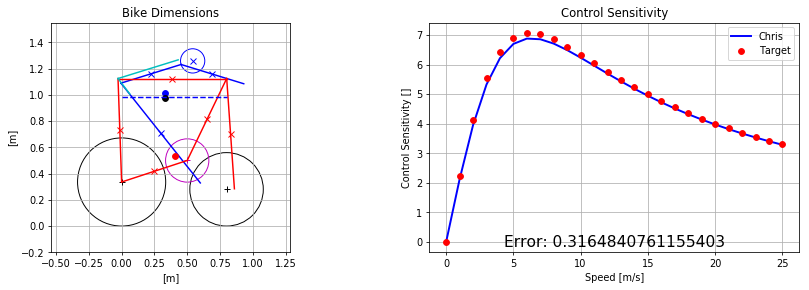



Bike Params:
{'wheelbase': 1.4, 'hip_angle': 100.0, 'headtube_angle': 20.0, 'crank_radius': 0.17, 'crank_x_offset': -0.44999999999999996, 'crank_z_offset': 0.39999999999999997, 'fork_offset': -0.06, 'seat_height': 0.6000000000000002, 'handlebar_radius': 0.2, 'front_wheel_radius': 0.336, 'rear_wheel_radius': 0.28, 'frame_mass': 5.0, 'crank_mass': 1.0, 'front_wheel_mass': 2.0, 'rear_wheel_mass': 2.0}


Rider: Chris
{'rider_name': 'Chris', 'rider_mass': 60.0, 'head_diameter': 0.185, 'torso_length': 0.48, 'torso_depth': 0.15, 'torso_width': 0.2, 'arm_length': 0.5, 'arm_diameter': 0.08, 'leg_length': 1.0, 'leg_diameter': 0.12}


Control Sensitivity Values:
[0.0, 2.1063326345851743, 3.93936802288054, 5.332476747683866, 6.255444668095576, 6.772741993748048, 6.9846889409334745, 6.987785100243197, 6.858521427425462, 6.65152002857188, 6.403384773876237, 6.137598746455419, 5.868695215027484, 5.6053302381415655, 5.352392941011823, 5.1124015656139905, 4.88640778257651, 4.674575177731646, 4.476546

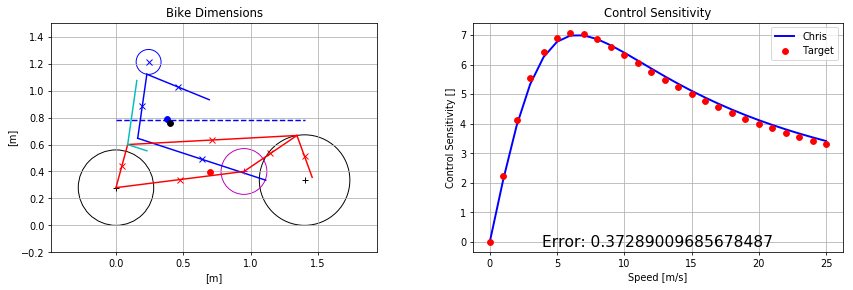



Bike Params:
{'wheelbase': 1.1, 'hip_angle': 60.0, 'headtube_angle': 16.0, 'crank_radius': 0.165, 'crank_x_offset': -0.5499999999999999, 'crank_z_offset': 0.49999999999999994, 'fork_offset': 0.0, 'seat_height': 1.0500000000000003, 'handlebar_radius': 0.15000000000000002, 'front_wheel_radius': 0.336, 'rear_wheel_radius': 0.336, 'frame_mass': 5.0, 'crank_mass': 1.0, 'front_wheel_mass': 2.0, 'rear_wheel_mass': 2.0}


Rider: Chris
{'rider_name': 'Chris', 'rider_mass': 60.0, 'head_diameter': 0.185, 'torso_length': 0.48, 'torso_depth': 0.15, 'torso_width': 0.2, 'arm_length': 0.5, 'arm_diameter': 0.08, 'leg_length': 1.0, 'leg_diameter': 0.12}


Control Sensitivity Values:
[0.0, 2.376703297616443, 4.388836668336039, 5.837111112832621, 6.716992503371131, 7.139217684499137, 7.241919836915602, 7.143128150550901, 6.928107157904095, 6.653011829511842, 6.352733603571099, 6.048007775856151, 5.750606401814875, 5.466795653887037, 5.199533224064625, 4.94983082111569, 4.717587083373381, 4.5020917897524

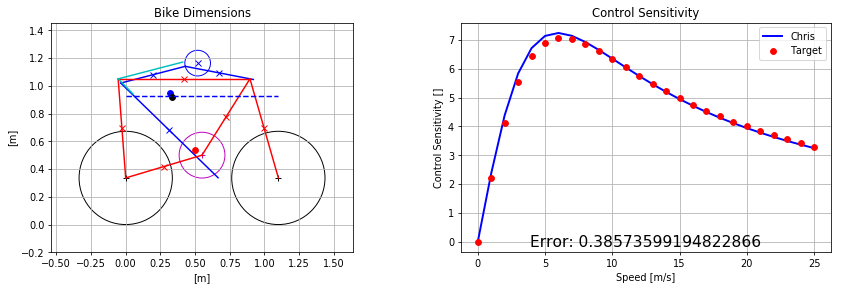



Bike Params:
{'wheelbase': 1.25, 'hip_angle': 50.0, 'headtube_angle': 18.0, 'crank_radius': 0.175, 'crank_x_offset': -0.6, 'crank_z_offset': 0.44999999999999996, 'fork_offset': -0.06, 'seat_height': 1.0000000000000004, 'handlebar_radius': 0.2, 'front_wheel_radius': 0.336, 'rear_wheel_radius': 0.28, 'frame_mass': 5.0, 'crank_mass': 1.0, 'front_wheel_mass': 2.0, 'rear_wheel_mass': 2.0}


Rider: Chris
{'rider_name': 'Chris', 'rider_mass': 60.0, 'head_diameter': 0.185, 'torso_length': 0.48, 'torso_depth': 0.15, 'torso_width': 0.2, 'arm_length': 0.5, 'arm_diameter': 0.08, 'leg_length': 1.0, 'leg_diameter': 0.12}


Control Sensitivity Values:
[0.0, 2.4054253527181464, 4.413375688648712, 5.818808499435595, 6.634250355762848, 6.99051755160202, 7.037808068758551, 6.898030841497226, 6.655644966680936, 6.364235060037543, 6.0559125729899685, 5.749032088982383, 5.453521750838531, 5.174291990579885, 4.913332795711756, 4.670977768410369, 4.44665657785693, 4.239338384467545, 4.047790029385804, 3.870

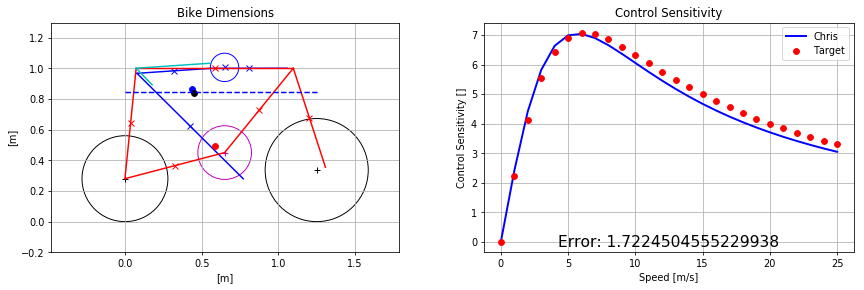

In [9]:
import os
!!rm temp/bikes.txt temp/bikes_log.txt

search_algorithm = button.value
if search_algorithm == 'Brute Force Search':
    print('Running Brute Force Search\n')
    %run -i python3/brute_force_search temp/bikes.txt 25 temp/target_control_curve.txt temp/bike_params.txt temp/rider_params.txt
elif search_algorithm == 'Unpartitioned Genetic Search':
    print('Running Unpartitioned Genetic Search\n')
    %run -i python3/unpartitioned_genetic_search temp/bikes.txt temp/bikes_log.txt temp/genetic_params.txt 25 temp/target_control_curve.txt temp/bike_params.txt temp/rider_params.txt
elif search_algorithm == 'Partitioned Genetic Search':
    print('Running Partitioned Genetic Search\n')
    %run -i python3/partitioned_genetic_search temp/bikes.txt temp/bikes_log.txt temp/genetic_params.txt temp/partitioning_params.txt temp/target_control_curve.txt temp/bike_params.txt temp/rider_params.txt
else:
    print('Unknown search algorithm: ' + str(search_algorithm))

if os.path.isfile('temp/bikes.txt'):
    %run -i python3/bike_file_plotter temp/bikes.txt temp/target_control_curve.txt temp/rider_params.txt